# Question
Q. Analyze and predict the viewership and success of movies and TV shows on a streaming platform based on various attributes such as type, title, director, cast, country, date added, release year, rating, duration, listed in, and description. 

# now i am Loading the some import library to perform this task 

In [159]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Exploring The Dataset 

In [160]:
data=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


# Overview of dataset:
About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

***Description of each column in the dataset:***

1. **show_id:** A unique identifier for each show or movie.
   
2. **type:** The type of content, either "Movie" or "TV Show."

3. **title:** The title of the movie or TV show.

4. **director:** The director of the movie or TV show. In the first and third entries, this information is not available (NaN).

5. **cast:** The cast or actors in the movie or TV show. In the first entry, this information is not available (NaN). In the second entry, there is a list of actors from the TV show "Blood & Water."

6. **country:** The country where the movie or TV show was produced or is associated with.

7. **date_added:** The date when the content was added to the streaming platform, in the format "Month Day, Year."

8. **release_year:** The year the movie or TV show was originally released.

9. **rating:** The content's rating, which indicates the recommended audience age or maturity level (e.g., "PG-13" or "TV-MA").

10. **duration:** The duration of the movie or TV show. In the first entry, the duration is given in minutes ("90 min"). In the second and third entries, it's indicated in the number of seasons ("2 Seasons" and "1 Season").

11. **listed_in:** The genre or category of the content, which can help classify it (e.g., "Documentaries," "International TV Shows," "Crime TV Shows").

12. **description:** A brief description or synopsis of the movie or TV show, providing an overview of the plot or subject matter.

In [161]:
# shape the dataset
data.shape 

(8807, 12)

so it meam the dataset have 8807 rows and 12 columns 

# now i am checking the dataset like dtype, columns name etc.

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Now i am checking the null value inside the dataset

In [163]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

now you can see director column having 2634 null values, cast columns having 825 null values , country columns having 831 null values, date_added columns having 10 null- values , rating columns having 4 columns and duration columns having 3 values so after see that null values i have to find way to handle that lets see another preprocessing .

In [164]:
# .count() method help know the how many rows value the particular columns having 
data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [165]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [166]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

# Analyzing the dataset

# Netflix data Null Percentage Analysis
Perform an analysis of null (missing) values in a dataset, specifically a dataset related to Netflix content. the column names and their corresponding null percentages, making it easy to identify which columns have the most missing data

In [167]:
null_values= data.isnull().sum()
total_rows=len(data)
print(total_rows)

8807


In [168]:
null_percentage=(null_values/total_rows)*100
null_percentage

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [169]:
null_percentage_df= pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage':null_percentage.values})
null_percentage_df

,Column Name,Null Percentage
0,show_id,0.000000
1,type,0.000000
2,title,0.000000
3,director,29.908028
4,cast,9.367549
5,country,9.435676
6,date_added,0.113546
7,release_year,0.000000
8,rating,0.045418
9,duration,0.034064


In [170]:
null_percentage_df=null_percentage_df.sort_values(by='Null Percentage',ascending=False)
null_percentage_df

,Column Name,Null Percentage
3,director,29.908028
5,country,9.435676
4,cast,9.367549
6,date_added,0.113546
8,rating,0.045418
9,duration,0.034064
0,show_id,0.000000
1,type,0.000000
2,title,0.000000
7,release_year,0.000000


In [171]:
null_percentage_df.reset_index(drop=True, inplace=True)
null_percentage_df

,Column Name,Null Percentage
0,director,29.908028
1,country,9.435676
2,cast,9.367549
3,date_added,0.113546
4,rating,0.045418
5,duration,0.034064
6,show_id,0.000000
7,type,0.000000
8,title,0.000000
9,release_year,0.000000



The high percentage of missing data in the "director" and "cast" columns may impact certain analyses or recommendations that rely on this information. Depending on the specific goals of the analysis, it may be necessary to address these missing values through data imputation or to focus on aspects of the dataset that are more complete.


# Imputation of Missing Values in Netflix Dataset

Missing values in selected columns of the Netflix dataset are imputed with the placeholder value "Unknown." The columns chosen for imputation include 'director,' 'country,' 'cast,' 'rating,' and 'duration.'

In [172]:
columns_to_impute = ['director', 'country', 'cast', 'rating', 'duration']
for column in columns_to_impute:
    data[column].fillna("Unknown", inplace=True)

/tmp/ipykernel_34/4004545644.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [173]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey Jr., Anthony Edwards, Brian Cox, Elias Koteas, Donal Logue, John Carroll Lynch, Dermot Mulroney, Chloë Sevigny",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a pair of cops investigate San Francisco's infamous Zodiac Killer in this thriller based on a true story."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies","Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain."


In [174]:
data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [175]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [176]:
data.description[1]

'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'

In [177]:
data.type

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object


# Segmentation of Netflix Dataset into TV Shows and Movies

the Netflix dataset is segmented into two distinct subsets: TV Shows and Movies. This segmentation is based on the 'type' column, which indicates whether a given entry is a "TV Show" or a "Movie."

In [178]:
tv_show = data[data['type']== 'TV Show']
movie = data[data['type']== 'Movie']


In [179]:
display(movie.head(4),'_')
display(tv_show.head(4))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.


'_'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


In [180]:
movies_df = data[data['type'] == 'Movie']
oldest_movie = movies_df[movies_df['release_year'] == movies_df['release_year'].min()]
oldest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,Frank Capra,Unknown,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries","Frank Capra's documentary chronicles the rise of authoritarianism in Germany, Italy and Japan as America prepares for a defense of liberty."
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries","Director John Ford captures combat footage of the Battle of Midway, an air and sea campaign that was a turning point in the war in the Pacific."


In [181]:
len(data['listed_in'].unique())

514

# Top 5 Popular Genres

In [182]:
genre_counts = data['listed_in'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)
print("Top 5 most popular genres:-", top_5_genres)

Top 5 most popular genres:- listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


# Top 5 Popular Genres

The top 5 most popular genres in the dataset, based on the number of titles available on Netflix, are as follows:

International Movies with 2752 titles.
Dramas with 2427 titles.
Comedies with 1674 titles.
International TV Shows with 1351 titles.
Documentaries with 869 titles.
These genres have a significant presence in the Netflix content library, with International Movies being the most prominent, followed by Dramas and Comedies. International TV Shows and Documentaries also have a substantial number of titles available on the platform, making them among the top genres on Netflix.

# List of Comedian_movies

In [183]:
comedian_movies = data[data['listed_in'] == 'Comedies']
comedian_movies.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David Spade, Rob Schneider, Salma Hayek, Maria Bello, Maya Rudolph, Colin Quinn, Tim Meadows, Joyce Van Patten",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,"Mourning the loss of their beloved junior high basketball coach, five middle-aged pals reunite at a lake house and rediscover the joys of being a kid."
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Daniel Sahyounie, Beau Brooks",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers and their two friends who became an international sensation by posting pranks and gags on YouTube.
182,s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant, Margaret Avery, Mike Epps, Mo'Nique, Cedric the Entertainer, Nicole Ari Parker, Michael Clarke Duncan, Louis C.K.",United States,"September 1, 2021",2008,PG-13,114 min,Comedies,"R.J. travels to Georgia for his parents' 50th anniversary. But after pompously flaunting his Hollywood lifestyle, he must examine what he's become."
342,s343,Movie,Major Payne,Nick Castle,"Damon Wayans, Karyn Parsons, William Hickey, Michael Ironside, Albert Hall, Ross Bickell, Orlando Brown, Peyton Chesson-Fohl, Steven Martini",United States,"August 1, 2021",1995,PG-13,97 min,Comedies,A hardened Marine is given his marching orders and must now lead a disorderly group of mismatched cadets into a junior ROTC competition.
348,s349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Perlman, Celia Weston, Alisha Boe, Charlie Tahan","United Kingdom, United States","August 1, 2021",2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner Martha befriends a fun-loving neighbor and forms a cheerleading club for young-at-heart seniors."


# Top 5 most popular actors

In [184]:
cast_counts = data['cast'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)
print("Top 5 most popular actors:-", top_5_cast)

Top 5 most popular actors:- cast
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Name: count, dtype: int64



# Top 5 popular actors

The top 5 most popular actors in the dataset, based on the number of appearances in Netflix content, are as follows:

Anupam Kher with 43 appearances.
Shah Rukh Khan with 35 appearances.
Julie Tejwani with 33 appearances.
Naseeruddin Shah with 32 appearances.
These actors have a significant presence in Netflix content, with Anupam Kher being the most prolific with 43 appearances. It's clear that they are well-represented in the platform's offerings, making them prominent figures in the world of Netflix entertainment.

# Recent_movie_data
according to dataset 

In [185]:
recent_movie_data = data[['title', 'type', 'description']].iloc[0]
pd.set_option('display.max_colwidth', None)
print(recent_movie_data)

title                                                                                                                                              Dick Johnson Is Dead
type                                                                                                                                                              Movie
description    As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.
Name: 0, dtype: object


# Data Visualization

# Data Types Distribution in Netflix Dataset

code generates a pie chart to visualize the distribution of data types within the Netflix dataset. Specifically, it provides insights into the number of columns in the dataset that belong to each data type category.

In [186]:

import plotly.graph_objects as go

data_types_counts = data.dtypes.astype(str).value_counts()
fig = go.Figure(data=[go.Pie(labels=data_types_counts.index, values=data_types_counts.values)])
fig.update_layout(title_text="Data Types Distribution")
fig.show()

# Netflix Content Release Year Distribution

generates a histogram using the Plotly Express library to visualize the distribution of Netflix content based on the release year. Each bar in the histogram represents the count of content items released in a particular year. The 'release_year' column from the Netflix dataset is used as the x-axis, and each bar's color represents the corresponding release year.

In [187]:
import plotly.express as px
import seaborn as sns

fig = px.histogram(data,x="release_year", title="release_year", color="release_year")
# Update the layout and add box plots
fig.update_layout(
    bargap=0.2
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Distribution of Netflix Content by Country with Box Plot Marginals

creates a histogram plot using the Plotly Express library (px) to visualize the distribution of Netflix content by country. The 'country' column is used as the x-axis variable, and a histogram is constructed to show the frequency of content from different countries. Additionally, the plot includes box plot marginals, which display summary statistics (such as quartiles and outliers) for the distribution of content within each country.

In [ ]:
ax = px.histogram(data,x="country",marginal="box",title="country")
ax.update_layout(bargap=0.2)

# Analysis of Netflix Content Categories

performs an analysis of the content categories within the Netflix dataset. It aims to provide insights into the distribution and popularity of different content categories.

************************************************
 listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64 
************************************************


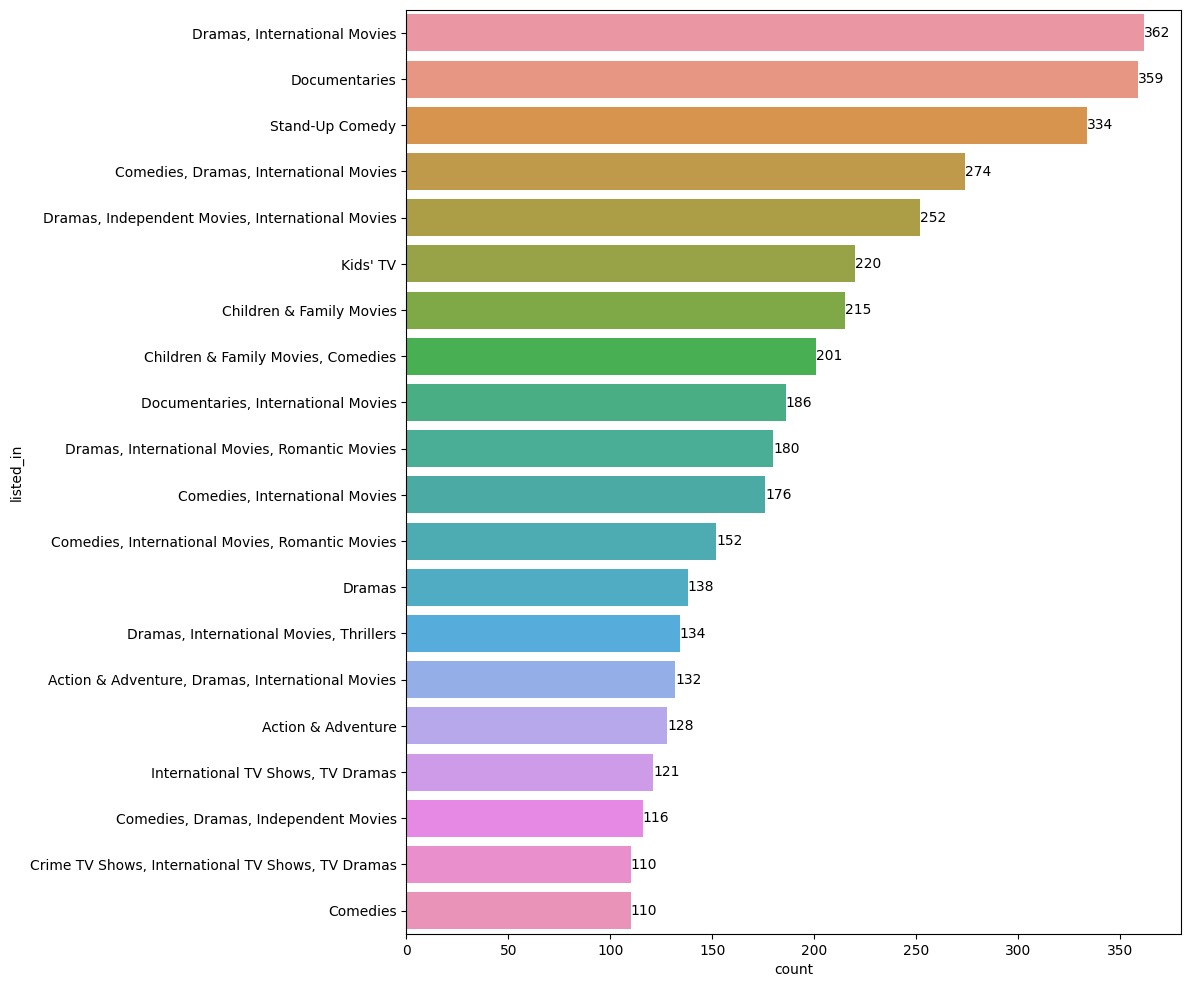

In [189]:
len(data['listed_in'].unique())
print('************************************************\n',data['listed_in'].value_counts(), '\n************************************************')
plt.figure(figsize=(10, 12))
ax = sns.countplot(data=data, y="listed_in", order=data['listed_in'].value_counts().index[0:20])
ax.bar_label(ax.containers[0])
plt.show()

# Feature Extraction

# Data Type Segmentation in the Netflix Dataset
the Netflix dataset is segmented into three groups based on the data types of the columns:

In [190]:
int_col = data.select_dtypes(include=('int')).columns
str_col = data.select_dtypes(include=('object')).columns
flt_col = data.select_dtypes(include=('float')).columns


# EDA: Distribution of Integer Columns by Content Type

an exploratory data analysis is performed to analyze the distribution of integer columns in a dataset, differentiating between "TV Shows" and "Movies" as content types. The code accomplishes the following:

In [191]:
# Print the integer columns
print(int_col)

# Remove 'id' from int_col and create a new list
int_col_without_id = [col for col in int_col if col != 'id']

# Print the updated list
print(int_col_without_id)



Index(['release_year'], dtype='object')
['release_year']


In [192]:
# Get the unique values of the 'outcome' column
unique_outcomes = data['type'].unique()
print(unique_outcomes)

['Movie' 'TV Show']


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



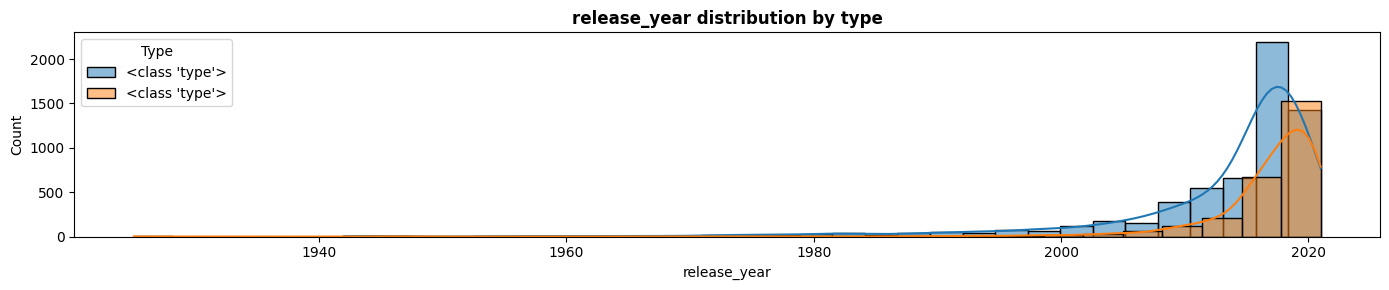

In [193]:

# Create subplots
plt.figure(figsize=(14, len(int_col_without_id) * 3))

for i, col in enumerate(int_col_without_id):
    plt.subplot(len(int_col_without_id), 1, i+1)
    
    for outcome in unique_outcomes:
        sns.histplot(data=data[data['type'] == outcome], x=col, bins=30, kde=True, label=type)

    plt.title(f"{col} distribution by type", fontweight="bold")
    plt.xlabel(col)
    plt.legend(title='Type')
    
plt.tight_layout()
plt.show()

# Netflix Content Rating Distribution

the Plotly library to create a histogram visualization of the distribution of content ratings in the Netflix dataset. The 'rating' column is used as the variable of interest on the x-axis, and different content ratings are color-coded for visual distinction.

In [194]:
fig = px.histogram(data,x="rating", title="Rating", color="rating")
# Update the layout and add box plots
fig.update_layout(
    bargap=0.2
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [195]:
len(data.duration.unique())

221

# Label Encoding Categorical Columns in Netflix Dataset

Label encoding is a common technique used to convert categorical data into a format suitable for machine learning algorithms. It assigns a unique integer label to each unique category within a column. This encoding simplifies the representation of categorical data and allows it to be used in machine learning models that require numerical input.

In [196]:
from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()
for col in str_col:
    data[col] = le.fit_transform(data[col].astype('str'))
    
data[col]


0       2577
1       1762
2       7341
3       3617
4       4416
        ... 
8802     895
8803    8483
8804    5228
8805    3315
8806    1004
Name: description, Length: 8807, dtype: int64

In [197]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Now Spliting the data into Training and Testing
**Data Preparation for Netflix Content Classification**

The separation of feature data (X) from the target variable (Y) is a fundamental step in machine learning and classification tasks. It allows for the training of classification models that predict the content type of Netflix entries based on the available features and attributes.

In [198]:
x = data.drop(['type'], axis='columns')
y = data[['type']]

**Data Splitting into Training and Testing Sets**

Splitting the dataset into training and testing sets is a fundamental step in machine learning, allowing for the development and evaluation of predictive models.

In [199]:
x

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,1975,2295,7246,603,1711,2020,7,210,274,2577
1,1111,1091,4303,409,426,1706,2021,11,110,414,1762
2,2222,2651,2105,6296,736,1706,2021,11,0,242,7341
3,3333,3506,4303,7246,736,1706,2021,11,0,297,3617
4,4444,3861,4303,4815,251,1706,2021,11,110,393,4416
...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,8770,979,4677,603,1419,2007,8,70,269,895
8803,8672,8773,4303,7246,736,788,2018,14,110,424,8483
8804,8673,8774,3631,3231,603,1366,2009,8,206,207,5228
8805,8674,8777,3247,7061,603,665,2006,6,206,125,3315


In [200]:
y

,type
0,0
1,1
2,1
3,1
4,1
...,...
8802,0
8803,1
8804,0
8805,0


In [201]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [202]:
x_train

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
411,3468,1466,3392,7281,736,856,2013,14,179,121,7359
7208,6900,3816,1837,655,621,1366,2005,7,218,20,1313
5974,5528,8796,4303,1452,736,1178,2016,9,0,393,8424
4944,4384,2378,2156,2236,162,175,2018,11,191,470,2490
1153,173,4384,2133,2786,581,1171,2013,7,51,326,7053
...,...,...,...,...,...,...,...,...,...,...,...
2939,2157,3159,1822,393,603,639,2020,8,7,318,1155
5064,4518,326,1651,686,53,730,2017,8,205,52,3257
7326,7031,4146,1498,3061,506,655,1998,8,11,24,4225
6448,6055,1425,711,1751,603,1433,1973,3,214,122,3724


In [203]:
y_train

,type
411,0
7208,0
5974,1
4944,0
1153,0
...,...
2939,0
5064,0
7326,0
6448,0


# Random Forest Classifier for Predictive Modeling

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)


/tmp/ipykernel_34/2847769994.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



# finding the Accuracy_Score

In [206]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the RandomForestClassifier on the test set: {accuracy}")

Accuracy of the RandomForestClassifier on the test set: 0.9948921679909194


# Finding confusion_matrix

In [207]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1208    5]
 [   4  545]]


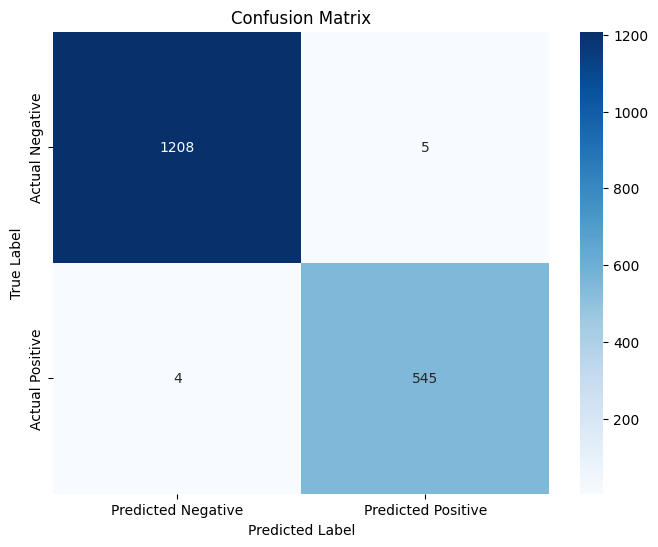

In [208]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# checking the f1_score

In [209]:
from sklearn.metrics import f1_score
# Calculate the F1 score
f1 = f1_score(y_test, predictions)

# Print the F1 score
print(f"F1 Score of the RandomForestClassifier on the test set: {f1}")


F1 Score of the RandomForestClassifier on the test set: 0.991810737033667


In [210]:
from sklearn.metrics import precision_score, recall_score
# Calculate precision
precision = precision_score(y_test, predictions)

# Calculate recall
recall = recall_score(y_test, predictions)

# Print precision and recall
print(f"Precision of the RandomForestClassifier on the test set: {precision}")
print(f"Recall of the RandomForestClassifier on the test set: {recall}")


Precision of the RandomForestClassifier on the test set: 0.990909090909091
Recall of the RandomForestClassifier on the test set: 0.9927140255009107


# Drawing the ROC AUC 

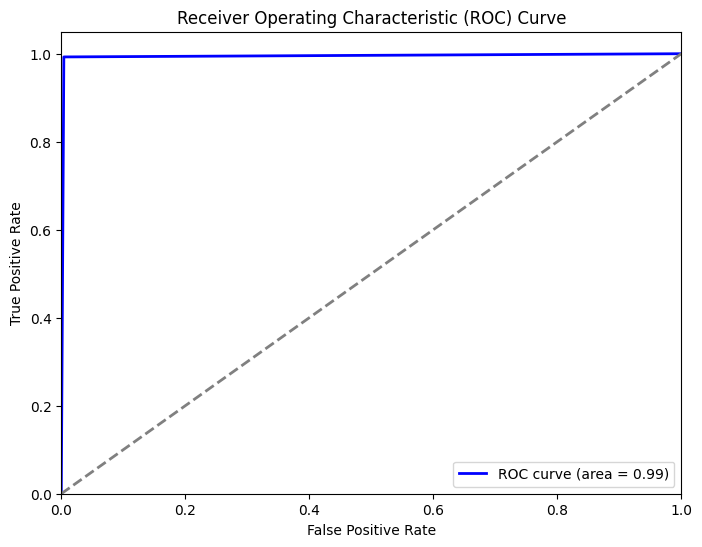

In [211]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

